In [1]:
import pandas as pd
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.automap import automap_base
from datetime import datetime

In [3]:
start_date = "2018-03-01"
end_date = "2018-03-10"

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [5]:
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [6]:
session = Session(engine)

In [7]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date[0])
last_date = last_date[0]

2017-08-23


In [8]:
one_yr_from_last_date = "2016-08-24"

In [10]:
#Precipitation Analysis
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date < last_date).\
    filter(Measurement.date > one_yr_from_last_date).\
    all()
print(results[:5])

[('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0)]


In [11]:
dates = [row[0] for row in results]
preciptation = [row[1] for row in results]

In [12]:
len(dates)

2005

In [13]:
precipitation_df = pd.DataFrame()

In [14]:
# precipitation_df = precipitation_df.append(dates)
# precipitation_df.head()

In [15]:
precipitation_df["date"] = dates
precipitation_df["precipitation"] = preciptation
precipitation_df.head()

,date,precipitation
0,2016-08-25,0.08
1,2016-08-26,0.00
2,2016-08-27,0.00
3,2016-08-28,0.01
4,2016-08-29,0.00


In [16]:
import matplotlib.pyplot as plt

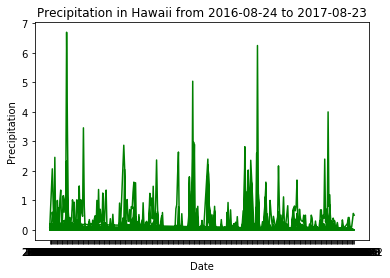

In [17]:
fig, ax = plt.subplots()
ax.plot(precipitation_df["date"], precipitation_df["precipitation"], color="g")
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation")
ax.set_title("Precipitation in Hawaii from " + one_yr_from_last_date + " to " + last_date)
plt.show()

In [18]:
precipitation_df.describe()

,precipitation
count,2005.000000
mean,0.172424
std,0.453190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
#Station Analysis
num_stations = session.query(func.count(Station.id)).all()
num_stations = num_stations[0][0]
print("There are " + str(num_stations) + " stations.")

There are 9 stations.


In [20]:
results2 = session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
print(results2)

[('USC00519281', 2772), ('USC00513117', 2696), ('USC00519397', 2685), ('USC00519523', 2572), ('USC00516128', 2484), ('USC00514830', 1937), ('USC00511918', 1932), ('USC00517948', 683), ('USC00518838', 342)]


In [21]:
most_active_station = results2[0]
num_obs_most_active_station = most_active_station[1]
most_active_station = most_active_station[0]
print("The most active station is " + str(most_active_station) + " with " + str(num_obs_most_active_station) + " observations.")

The most active station is USC00519281 with 2772 observations.


In [22]:
results3 = session.query(Measurement.tobs).\
    filter(Measurement.date < last_date).\
    filter(Measurement.date > one_yr_from_last_date).\
    filter(Measurement.station == most_active_station).\
    all()
results3[:5]

[(80), (80), (75), (73), (78)]

In [23]:
temp_list = [row[0] for row in results3]
print(temp_list[:5])

[80, 80, 75, 73, 78]


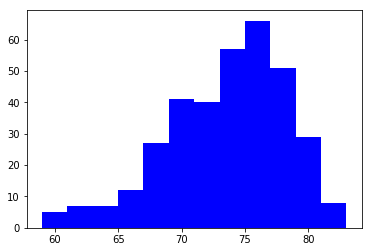

In [24]:
plt.hist(temp_list, 12, color="b")
plt.show()

In [25]:
#Temperature Analysis
# return the minimum, average, and maximum temperatures for that range of dates
def calc_temp(start_date, end_date):
#     start_date = date.strftime("%y/%m/%d")
#     end_date = date.strftime("%y/%m/%d")
    
    results3 = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.date < end_date).\
    filter(Measurement.date > start_date).\
    all()
    
    min_temp = results3[0][0]
    max_temp = results3[0][1]
    avg_temp = results3[0][2]
    
    return min_temp, max_temp, avg_temp

In [26]:
from dateutil.relativedelta import relativedelta

In [27]:
new_start_date = datetime.strptime(start_date, "%Y-%m-%d").date()
new_start_date = new_start_date + relativedelta(years=-1)
new_start_date = datetime.strftime(new_start_date, "%Y-%m-%d")
print(new_start_date)
new_end_date = datetime.strptime(end_date, "%Y-%m-%d").date()
new_end_date = new_end_date + relativedelta(years=-1)
new_end_date = datetime.strftime(new_end_date, "%Y-%m-%d")
print(new_end_date)

2017-03-01
2017-03-10


In [28]:
min_temp, max_temp, avg_temp = calc_temp(new_start_date, new_end_date)
print(min_temp, max_temp, avg_temp)

62 78 71.02439024390245


In [29]:
variation = max_temp-min_temp

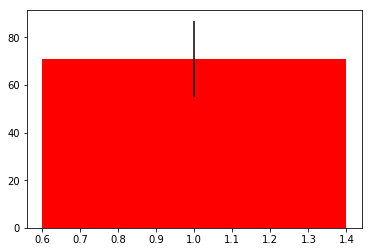

In [30]:
fig, ax = plt.subplots()
ax.bar([1], avg_temp, color='r', yerr=variation)

plt.show()